In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("samples_cancer.csv")
print(df)

df.drop(columns=['ID'], inplace=True)
print(df)

import numpy as np
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df.dropna

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print("X values")
print(x)
print("Y values")
print(y)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(scaler.fit(x))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

          ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0    1000025      5         1          1        1            2       1   
1    1002945      5         4          4        5            7      10   
2    1015425      3         1          1        1            2       2   
3    1016277      6         8          8        1            3       4   
4    1017023      4         1          1        3            2       1   
..       ...    ...       ...        ...      ...          ...     ...   
694   776715      3         1          1        1            3       2   
695   841769      2         1          1        1            2       1   
696   888820      5        10         10        3            7       3   
697   897471      4         8          6        4            3       4   
698   897471      4         8          8        5            4       5   

     BlandChrom  NormNucl  Mit  Class  
0             3         1    1      2  
1             3         2    1 

In [3]:
x_scaled = scaler.transform(x)
print(x_scaled)

[[ 0.19790469 -0.70221201 -0.74177362 ... -0.18182716 -0.61292736
  -0.34839971]
 [ 0.19790469  0.27725185  0.26278299 ... -0.18182716 -0.28510482
  -0.34839971]
 [-0.51164337 -0.70221201 -0.74177362 ... -0.18182716 -0.61292736
  -0.34839971]
 ...
 [ 0.19790469  2.23617957  2.2718962  ...  1.86073779  2.33747554
   0.22916583]
 [-0.15686934  1.58320366  0.93248739 ...  2.67776377  1.02618536
  -0.34839971]
 [-0.15686934  1.58320366  1.6021918  ...  2.67776377  0.37054027
  -0.34839971]]


In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [7]:
logreg.fit(x, y)

LogisticRegression()

In [9]:
y_pred = logreg.predict(x_test)
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
115,2,2
392,2,2
316,4,4
519,4,4
313,2,2
...,...,...
21,4,4
469,2,2
521,2,2
515,4,4


In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[85,  2],
       [ 3, 47]], dtype=int64)

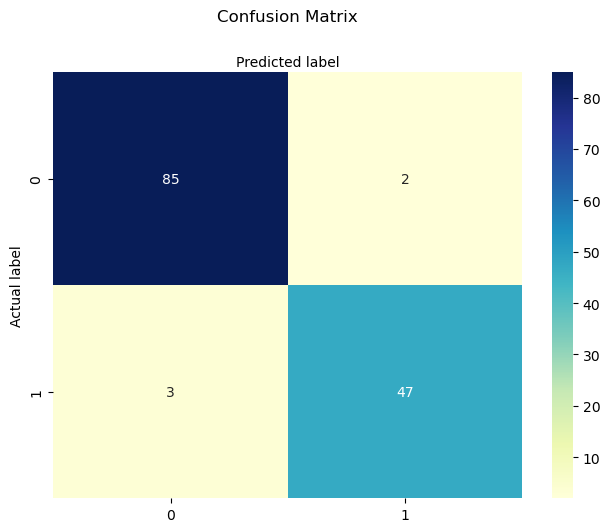

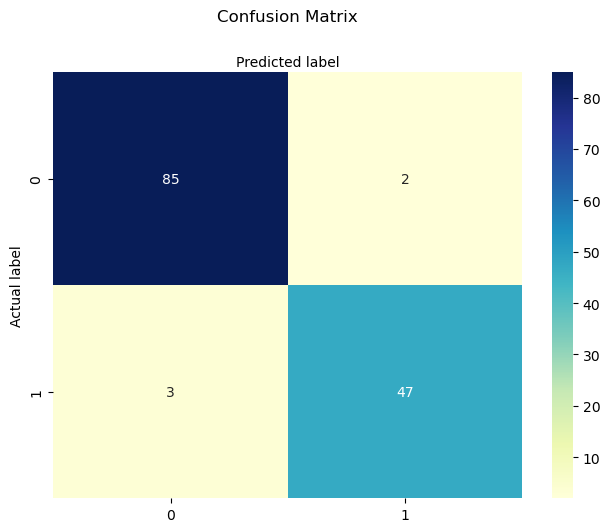

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label=2))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label=2))

Accuracy: 0.9635036496350365
Precision: 0.9659090909090909
Recall: 0.9770114942528736


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Malignent','Benign']))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97        87
           4       0.96      0.94      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

              precision    recall  f1-score   support

   Malignent       0.97      0.98      0.97        87
      Benign       0.96      0.94      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



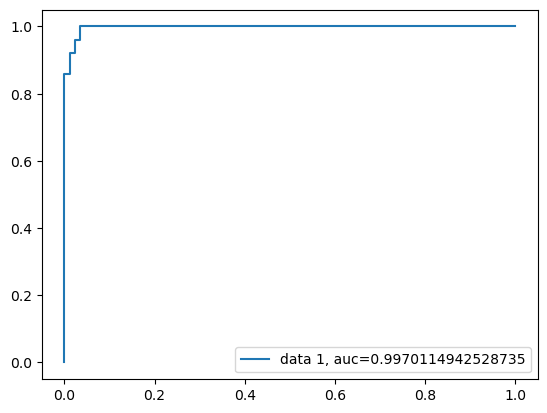

In [35]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label = 4)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()